  <h1 align=\"center\"><font color='green'><font size=\"6\">Customer Segmentation</font> </h1>  

<div style="background-color: #90EE90;">.</div>  </div>

  - Performing customer segmentation in a dataset obtained from kaggle.
  - Kmeans clustering is used to perform the segmentation.

<div class = "alert alert-block alert-success">
     <font size = "5">
  K-Means clustering

#### K-Means clustering is a type of unsupervised learning algorithm that groups data points into k clusters based on their features, using Euclidean distance to measure similarity between points and cluster centroids.

 - Groups data points into k clusters based on feature similarity, minimizing variance within each cluster.
 - Requires only the feature data; no labeled outputs are needed.
 - Starts with k initial centroids (randomly selected points).
 -  Assigns points to the nearest centroid, then updates centroids based on the mean of assigned points, repeating until convergence.
 -  Typically uses Euclidean distance to measure similarity.
 - Efficient for large datasets but can be sensitive to the initial choice of centroids.
 - Used in customer segmentation, image compression, market research, and anomaly detection.

In [1]:
#importing necessary libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')

In [2]:
#creating a dataframe
customer = pd.read_csv('test.csv')
customer

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6
...,...,...,...,...,...,...,...,...,...,...
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4


In [3]:
customer.head()
#displaying first 5 rows

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6


In [4]:
customer.tail()
#displaying last 5 rows

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
2622,467954,Male,No,29,No,Healthcare,9.0,Low,4.0,Cat_6
2623,467958,Female,No,35,Yes,Doctor,1.0,Low,1.0,Cat_6
2624,467960,Female,No,53,Yes,Entertainment,NaN,Low,2.0,Cat_6
2625,467961,Male,Yes,47,Yes,Executive,1.0,High,5.0,Cat_4
2626,467968,Female,No,43,Yes,Healthcare,9.0,Low,3.0,Cat_7


In [5]:
customer.shape
#gives no. of rows & colums

(2627, 10)

In [6]:
customer.size
#displaying the dataframe size

26270

In [7]:
customer.columns
#displaying all the columns name 

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1'],
      dtype='object')

In [8]:
customer.info()
#displaying valuable information of dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
dtypes: float64(2), int64(2), object(6)
memory usage: 205.4+ KB


In [9]:
customer.describe()
#displaying the statistical properties of dataframe

,ID,Age,Work_Experience,Family_Size
count,2627.000000,2627.000000,2358.000000,2514.000000
mean,463433.918919,43.649791,2.552587,2.825378
std,2618.245698,16.967015,3.341094,1.551906
min,458989.000000,18.000000,0.000000,1.000000
25%,461162.500000,30.000000,0.000000,2.000000
50%,463379.000000,41.000000,1.000000,2.000000
75%,465696.000000,53.000000,4.000000,4.000000
max,467968.000000,89.000000,14.000000,9.000000


In [10]:
customer.describe(include = 'object').T

,count,unique,top,freq
Gender,2627,2,Male,1424
Ever_Married,2577,2,Yes,1520
Graduated,2603,2,Yes,1602
Profession,2589,9,Artist,802
Spending_Score,2627,3,Low,1616
Var_1,2595,7,Cat_6,1672


In [11]:
customer.duplicated().sum()
#checking if the dataframe has duplicate values 

0

In [12]:
customer.isnull().sum()
#checking for null values 

ID                   0
Gender               0
Ever_Married        50
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [13]:
#filling null values with unknown
customer['Ever_Married'].fillna('Unknown', inplace = True)

In [14]:
customer.isnull().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated           24
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [15]:
#filling null values with unknown
customer['Graduated'].fillna('Unknown', inplace = True)

In [16]:
customer['Age'].dtype

dtype('int64')

In [17]:
#Reassuring null values were handled
customer.isnull().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession          38
Work_Experience    269
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [18]:
#filling null values with unemployed
customer['Profession'].fillna('Unemployed', inplace = True)

In [19]:
customer['Work_Experience'].dtype

dtype('float64')

In [20]:
#calculating average work experience
avg_work_experience = customer['Work_Experience'].mean()
avg_work_experience

2.552586938083121

In [21]:
#filling the null values with average experience
customer['Work_Experience'].fillna(avg_work_experience, inplace = True )

In [22]:
customer.isnull().sum()

ID                   0
Gender               0
Ever_Married         0
Age                  0
Graduated            0
Profession           0
Work_Experience      0
Spending_Score       0
Family_Size        113
Var_1               32
dtype: int64

In [23]:
#calculating average family size 
#astype(int) is used as person cannot be 2.75
avg_Family_Size  = customer['Family_Size'].mean().astype(int) 
avg_Family_Size 

2

In [24]:
#filling na with average 
customer['Family_Size'].fillna(avg_Family_Size, inplace = True)

In [25]:
customer = customer.drop('Var_1', axis=1)
#Here, I have dropped var_1 instead of handling it's null values 
#As, the information provided isn't clear and also has no major role on the analysis 

In [26]:
#checking the shape of our dataframe
customer.shape

(2627, 9)

In [27]:
customer.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
dtype: int64

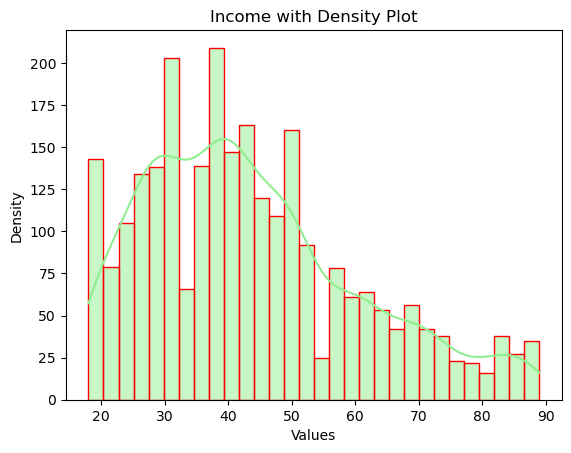

In [28]:
#Visualizing the age
sns.histplot(customer['Age'], bins=30, kde=True, color='lightgreen', edgecolor='red')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Income with Density Plot')
plt.show()

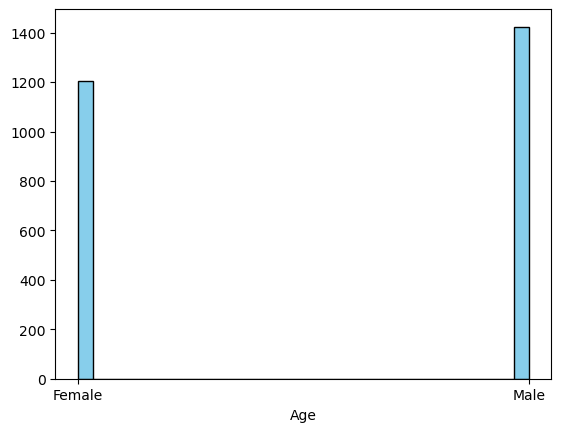

In [29]:
#Visualizing the gender column
plt.hist(customer['Gender'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Age')
plt.show()

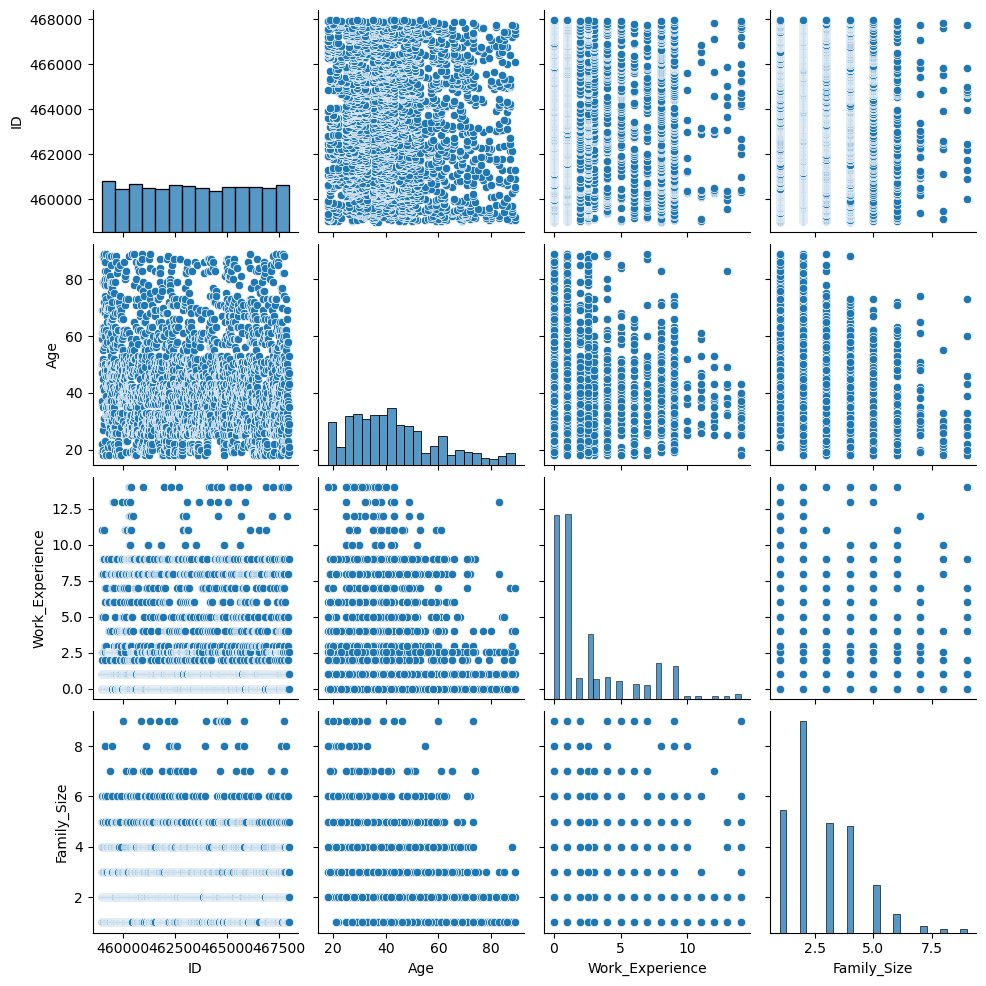

In [30]:
#visualizing the entire data
sns.pairplot(customer)

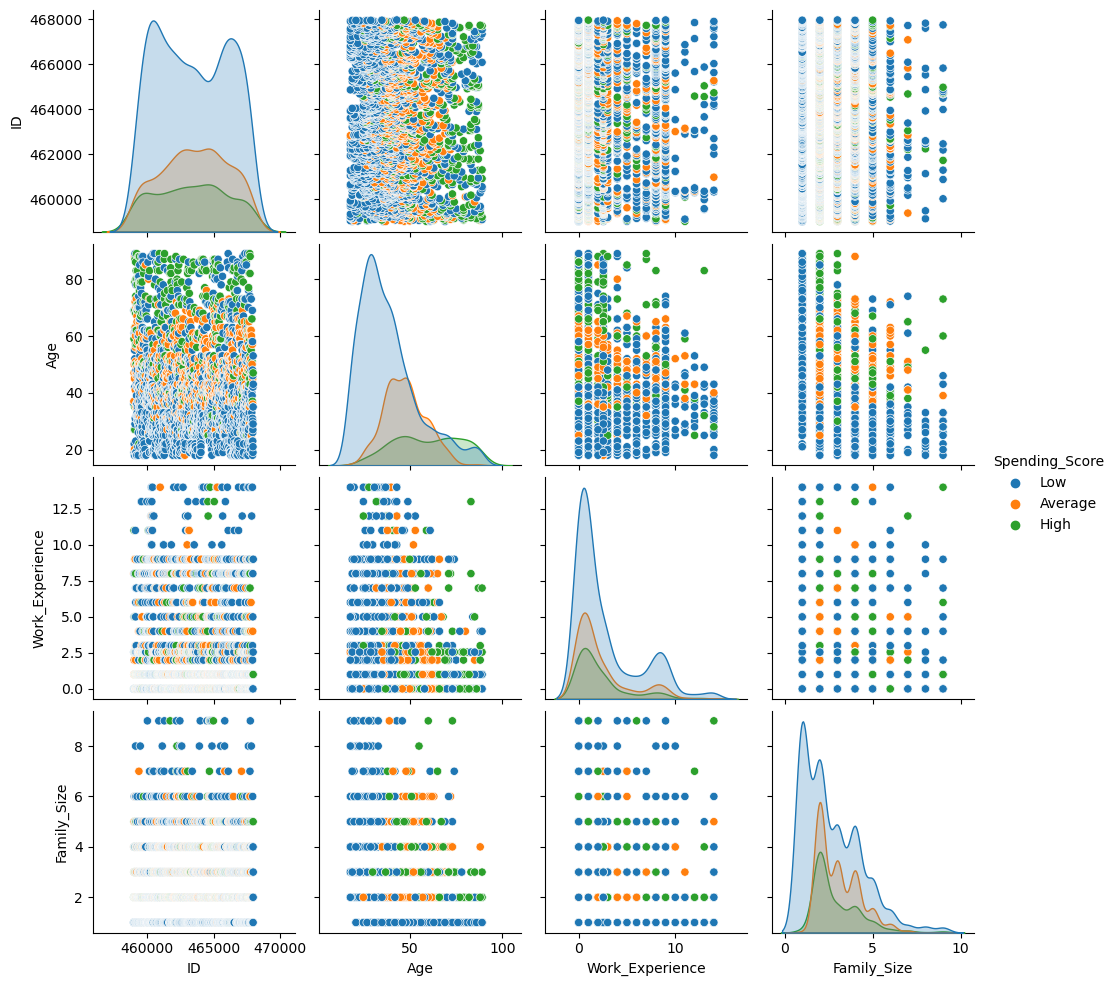

In [31]:
#entire data based on Spending_score
sns.pairplot(customer, hue = 'Spending_Score')

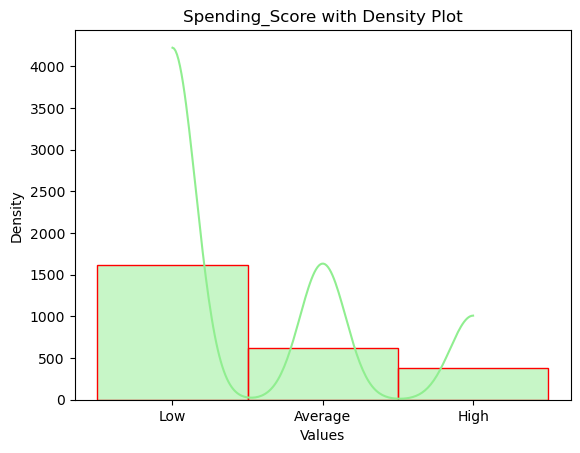

In [32]:
#visualizing the spending score
sns.histplot(customer['Spending_Score'], bins=30, kde=True, color='lightgreen', edgecolor='red')
plt.xlabel('Values')
plt.ylabel('Density')
plt.title('Spending_Score with Density Plot')
plt.show()

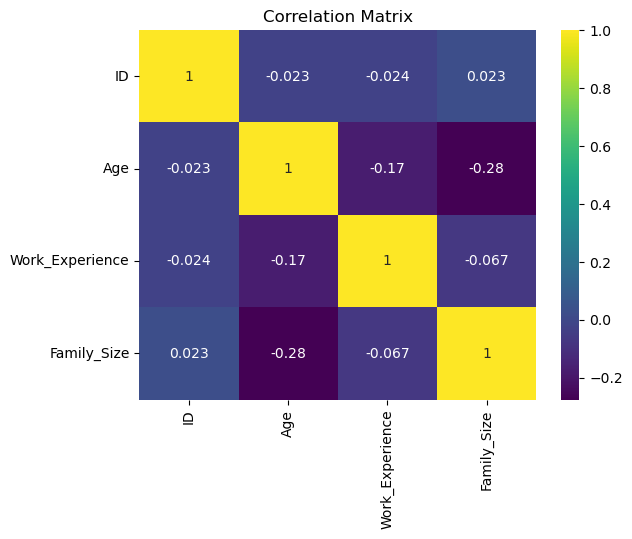

In [33]:
#Visualizing the correlation betn variables 
sns.heatmap(customer.corr(), annot=True, cmap="viridis")
plt.title("Correlation Matrix")
plt.show()

##### One-hot encoding is a technique that converts categorical variables into a binary format, creating new binary columns for each category where a value of 1 indicates the presence of that category and 0 indicates its absence.

In [34]:
#one-Hot encoding to interpret gender into numbers
customer_revised = pd.get_dummies(customer, columns=['Gender'])

In [35]:
customer_revised.head()

,ID,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Gender_Female,Gender_Male
0,458989,Yes,36,Yes,Engineer,0.000000,Low,1.0,1,0
1,458994,Yes,37,Yes,Healthcare,8.000000,Average,4.0,0,1
2,458996,Yes,69,No,Unemployed,0.000000,Low,1.0,1,0
3,459000,Yes,59,No,Executive,11.000000,High,2.0,0,1
4,459001,No,19,No,Marketing,2.552587,Low,4.0,1,0


In [36]:
customer_revised = customer_revised.drop('Gender_Male', axis = 1)
#dropping this column as we now that if female is 1 then male is 0.

In [37]:
customer_revised['Spending_Score']=customer_revised['Spending_Score'].replace({'Low':1,'Average':2,'High':3})
#changing the values to numeric as I do not want to split the columns into 3 parts using one-hot encoding

In [38]:
customer_revised.head()

,ID,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Gender_Female
0,458989,Yes,36,Yes,Engineer,0.000000,1,1.0,1
1,458994,Yes,37,Yes,Healthcare,8.000000,2,4.0,0
2,458996,Yes,69,No,Unemployed,0.000000,1,1.0,1
3,459000,Yes,59,No,Executive,11.000000,3,2.0,0
4,459001,No,19,No,Marketing,2.552587,1,4.0,1


In [39]:
customer_revised=customer_revised[['Age','Spending_Score','Gender_Female','Family_Size']]
#selecting only the required columns 

In [40]:
customer_revised.columns
#viewing the columns selected for reassurance

Index(['Age', 'Spending_Score', 'Gender_Female', 'Family_Size'], dtype='object')

In [41]:
scale = StandardScaler()
#standardizing for better accuracy 

In [42]:
#Creating dataframe with scaled value
customer_revised = pd.DataFrame(scale.fit_transform(customer_revised))
customer_revised

,0,1,2,3
0,-0.450948,-0.721759,1.087983,-1.172097
1,-0.391999,0.635478,-0.919132,0.792450
2,1.494372,-0.721759,1.087983,-1.172097
3,0.904881,1.992715,-0.919132,-0.517248
4,-1.453083,-0.721759,1.087983,0.792450
...,...,...,...,...
2622,-0.863592,-0.721759,-0.919132,0.792450
2623,-0.509897,-0.721759,1.087983,-1.172097
2624,0.551187,-0.721759,1.087983,-0.517248
2625,0.197492,1.992715,-0.919132,1.447299


In [43]:
#Renaming columnns for better understanding 
customer_revised = customer_revised.rename(columns={0:'Age',1:'Spending_Score',2:'Gender',3:'Family_size'})

##### The elbow method is a technique used to determine the optimal number of clusters in K-Means by plotting the inertia (within-cluster variance) against the number of clusters and looking for a point where the rate of decrease sharply changes, resembling an "elbow."

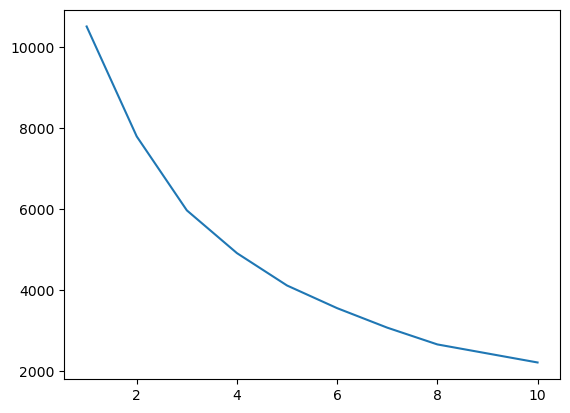

In [44]:
#Using elbow method to determine optimal number of clusters 
inertia_score = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(customer_revised)
    inertia_score.append(kmeans.inertia_)
plt.plot(range(1,11),inertia_score)    

In [45]:
#Based on the plot assigning 3 as cluster number
clustering1 = KMeans(n_clusters= 3)

In [46]:
#calculating cluster based on spending score
clustering1.fit(customer_revised[['Spending_Score']])

KMeans(n_clusters=3)

In [47]:
#labels the data based on cluster meaning 
#2 labeled data belongs to cluster 1
clustering1.labels_

array([1, 0, 1, ..., 1, 2, 1])

In [48]:
#Assigning the labeled cluster to new column 
customer_revised['Spending_Score_cluster'] = clustering1.labels_
customer_revised.head()

,Age,Spending_Score,Gender,Family_size,Spending_Score_cluster
0,-0.450948,-0.721759,1.087983,-1.172097,1
1,-0.391999,0.635478,-0.919132,0.792450,0
2,1.494372,-0.721759,1.087983,-1.172097,1
3,0.904881,1.992715,-0.919132,-0.517248,2
4,-1.453083,-0.721759,1.087983,0.792450,1


In [49]:
#Number of data in each cluster 
customer_revised['Spending_Score_cluster'].value_counts()

1    1616
0     625
2     386
Name: Spending_Score_cluster, dtype: int64

In [50]:
#viewing inertia of the clustering method,
#it measures how tightly the clusters are packed
#lower values indicate better clustering
clustering1.inertia_

1.2620492584565205e-26

In [55]:
#Calculation mean value based on Spending_score_cluster
customer_revised.groupby('Spending_Score_cluster')[['Age','Gender']].mean()

,Age,Gender
Spending_Score_cluster,,
0,0.215601,-0.045635
1,-0.306421,0.039713
2,0.933745,-0.092367


<Axes: xlabel='Gender', ylabel='Age'>

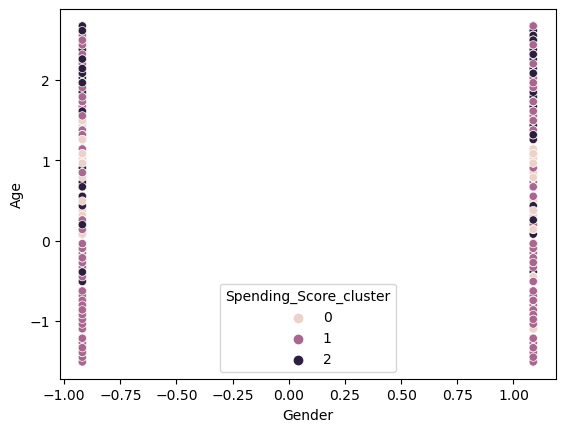

In [71]:
#Plotting age vs gender
sns.scatterplot(data = customer_revised, x = 'Gender', y = 'Age', hue = 'Spending_Score_cluster')

In [66]:
#Calculation mean value based on Spending_score_cluster
customer_revised.groupby('Spending_Score_cluster')[['Family_size']].mean()

,Family_size
Spending_Score_cluster,
0,0.166938
1,-0.083654
2,0.079920


<Axes: xlabel='Family_size', ylabel='Spending_Score'>

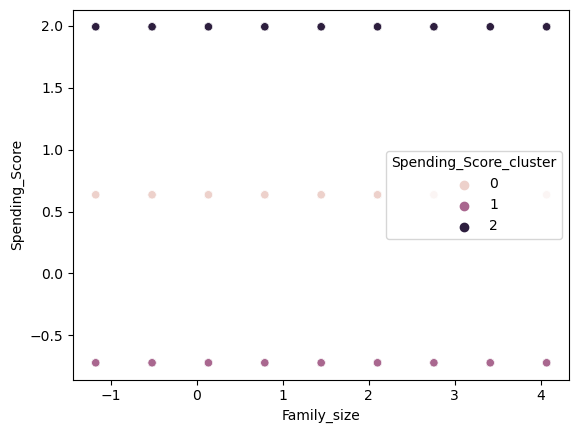

In [67]:
#Plotting spending score vs family size
sns.scatterplot(data = customer_revised, x = 'Family_size', y = 'Spending_Score', hue = 'Spending_Score_cluster')